# Point Pattern Analysis 

This can be useful to understand locational analysis.




Kinds of questions we can try to answer:

What does the pattern look like?

What is the nature of the distribution of points?

Are there any structures in the way locations are arranged over space? That is, are events clustered? Or are they dispersed?

Why do events occur in those places and not in others?


Brining in two new libraries.

## HELLO: SEABORN (Non-interactive static images) 

In [105]:
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

Next - I will import LA City Assessors Parcel Data from the open portal system. 
For this first part I am requesting data for the city of Inglewood that was registered by the assessors office in the roll year of 2010. I want to look in to buildings built between 2000 and 2010. 

In [106]:
# connect to the data portal
client = Socrata("data.lacounty.gov", None)

results = client.get("9trm-uz8i",
                    limit=50000,
                    where="taxratearea_city='INGLEWOOD' AND rollyear=2010 AND yearbuilt between 2000 and 2010")

df10 = pd.DataFrame.from_records(results)


In [107]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   situszip                   576 non-null    object
 1   taxratearea_city           576 non-null    object
 2   ain                        576 non-null    object
 3   rollyear                   576 non-null    object
 4   taxratearea                576 non-null    object
 5   assessorid                 576 non-null    object
 6   propertylocation           567 non-null    object
 7   usetype                    576 non-null    object
 8   usecode                    576 non-null    object
 9   usecodedescchar1           576 non-null    object
 10  usecodedescchar2           576 non-null    object
 11  usecodedescchar3           576 non-null    object
 12  usecodedescchar4           576 non-null    object
 13  totbuildingdatalines       576 non-null    object
 14  yearbuilt 

Ok, so apparently there are 510 structures registered with the assessors office that were built in the city of Inglewood between 2000 and 2010. 

In [108]:
df10.sample()

,situszip,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,usetype,usecode,usecodedescchar1,...,situsfraction,situsdirection,situsstreet,situsunit,situscity,situszip5,rowid,center_lat,center_lon,location_1
14,90305-1221,INGLEWOOD,4012021052,2010,04569,4012-021-052,7701 VICTORIA AVE INGLEWOOD CA 90305,SFR,0100,Residential,...,,,VICTORIA AVE,,INGLEWOOD CA,90305,20104012021052,33.96995916,-118.33333150,"{'latitude': '33.96995916', 'longitude': '-118..."


In [109]:
df10.head(5)

,situszip,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,usetype,usecode,usecodedescchar1,...,situsfraction,situsdirection,situsstreet,situsunit,situscity,situszip5,rowid,center_lat,center_lon,location_1
0,90302-1140,INGLEWOOD,4002015038,2010,04569,4002-015-038,1300 CENTINELA AVE INGLEWOOD CA 90302,C/I,1100,Commercial,...,,,CENTINELA AVE,,INGLEWOOD CA,90302,20104002015038,33.97689024,-118.36174626,"{'latitude': '33.97689024', 'longitude': '-118..."
1,90302-1224,INGLEWOOD,4002020007,2010,04569,4002-020-007,114 W 64TH PL INGLEWOOD CA 90302,R-I,0500,Residential,...,,W,64TH PL,,INGLEWOOD CA,90302,20104002020007,33.97982101,-118.35882967,"{'latitude': '33.97982101', 'longitude': '-118..."
2,90305-1021,INGLEWOOD,4009021013,2010,04569,4009-021-013,3029 W 78TH ST INGLEWOOD CA 90305,SFR,0100,Residential,...,,W,78TH ST,,INGLEWOOD CA,90305,20104009021013,33.96933255,-118.32629165,"{'latitude': '33.96933255', 'longitude': '-118..."
3,90305-1120,INGLEWOOD,4009026002,2010,04569,4009-026-002,2406 W 78TH ST INGLEWOOD CA 90305,SFR,0100,Residential,...,,W,78TH ST,,INGLEWOOD CA,90305,20104009026002,33.96881495,-118.32026095,"{'latitude': '33.96881495', 'longitude': '-118..."
4,90305-1805,INGLEWOOD,4010032006,2010,04569,4010-032-006,2611 W 84TH PL INGLEWOOD CA 90305,SFR,0100,Residential,...,,W,84TH PL,,INGLEWOOD CA,90305,20104010032006,33.96181235,-118.32148076,"{'latitude': '33.96181235', 'longitude': '-118..."


In [110]:
df10.tail(5)

,situszip,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,usetype,usecode,usecodedescchar1,...,situsfraction,situsdirection,situsstreet,situsunit,situscity,situszip5,rowid,center_lat,center_lon,location_1
571,90301-2003,INGLEWOOD,4126002015,2010,13265,4126-002-015,8707 AVIATION BLVD INGLEWOOD CA 90301,C/I,3300,Industrial,...,,,AVIATION BLVD,,INGLEWOOD CA,90301,20104126002015,33.95769688,-118.37797129,"{'latitude': '33.95769688', 'longitude': '-118..."
572,90301-2003,INGLEWOOD,4126002019,2010,13265,4126-002-019,8715 AVIATION BLVD INGLEWOOD CA 90301,C/I,3300,Industrial,...,,,AVIATION BLVD,,INGLEWOOD CA,90301,20104126002019,33.95769688,-118.37797129,"{'latitude': '33.95769688', 'longitude': '-118..."
573,90301-2003,INGLEWOOD,4126002017,2010,13265,4126-002-017,8711 AVIATION BLVD INGLEWOOD CA 90301,C/I,3300,Industrial,...,,,AVIATION BLVD,,INGLEWOOD CA,90301,20104126002017,33.95769688,-118.37797129,"{'latitude': '33.95769688', 'longitude': '-118..."
574,90301-2003,INGLEWOOD,4126002013,2010,13265,4126-002-013,8703 AVIATION BLVD INGLEWOOD CA 90301,C/I,3300,Industrial,...,,,AVIATION BLVD,,INGLEWOOD CA,90301,20104126002013,33.95769688,-118.37797129,"{'latitude': '33.95769688', 'longitude': '-118..."
575,90301-2003,INGLEWOOD,4126002012,2010,13265,4126-002-012,8701 AVIATION BLVD INGLEWOOD CA 90301,C/I,3300,Industrial,...,,,AVIATION BLVD,,INGLEWOOD CA,90301,20104126002012,33.95769688,-118.37797129,"{'latitude': '33.95769688', 'longitude': '-118..."


In [111]:
# convert pandas dataframe to geodataframe
gdf10 = gpd.GeoDataFrame(df10, 
                     crs='EPSG:4326',
                     geometry=gpd.points_from_xy(df10.center_lon, df10.center_lat))

In [112]:
# convert lat/lon to floats
df10.center_lon = df10.center_lon.astype('float')
df10.center_lat = df10.center_lat.astype('float')
gdf10.rollyear = gdf10.rollyear.astype('int')

In [113]:
# drop the unmapped rows
gdf10 = gdf10[gdf10.center_lon!=0]

In [114]:
# filter columns

gdf10=gdf10[['taxratearea_city','usetype','usecodedescchar1','yearbuilt',
         'roll_totalvalue','center_lat','center_lon','geometry']]


In [115]:
# rename columns
gdf10.columns = ['city','use_type','use_desc','year_built','total_value',
                 'center_lat','center_lon','geometry']

In [116]:
gdf10.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   city         576 non-null    object  
 1   use_type     576 non-null    object  
 2   use_desc     576 non-null    object  
 3   year_built   576 non-null    object  
 4   total_value  576 non-null    object  
 5   center_lat   576 non-null    float64 
 6   center_lon   576 non-null    float64 
 7   geometry     576 non-null    geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 40.5+ KB


In [117]:
gdf10.sample()

,city,use_type,use_desc,year_built,total_value,center_lat,center_lon,geometry
19,INGLEWOOD,R-I,Residential,2000,319883,33.978519,-118.335532,POINT (-118.33553 33.97852)


In [118]:
gdf10=gdf10.to_crs('EPSG:3857')

In [119]:
gdf10 = gdf10.dropna()

In [120]:
gdf10 = gdf10[gdf10.total_value!=0]

In [121]:
gdf10.shape

(576, 8)

In [122]:
gdf10.sample(20)

,city,use_type,use_desc,year_built,total_value,center_lat,center_lon,geometry
214,INGLEWOOD,SFR,Residential,2005,455000,33.955673,-118.331380,POINT (-13172588.973 4022851.603)
543,INGLEWOOD,CND,Residential,2002,92000,33.934545,-118.342503,POINT (-13173827.152 4020016.469)
93,INGLEWOOD,C/I,Commercial,2007,432428,33.952942,-118.352178,POINT (-13174904.171 4022485.085)
194,INGLEWOOD,SFR,Residential,2005,455000,33.955176,-118.332448,POINT (-13172707.873 4022784.854)
239,INGLEWOOD,SFR,Residential,2005,68129,33.952801,-118.331291,POINT (-13172579.087 4022466.145)
319,INGLEWOOD,SFR,Residential,2005,548000,33.955121,-118.331433,POINT (-13172594.874 4022777.454)
324,INGLEWOOD,SFR,Residential,2005,455000,33.955759,-118.334554,POINT (-13172942.321 4022863.080)
232,INGLEWOOD,SFR,Residential,2006,374110,33.952943,-118.334081,POINT (-13172889.595 4022485.111)
138,INGLEWOOD,SFR,Residential,2006,415000,33.953902,-118.333522,POINT (-13172827.409 4022613.887)
429,INGLEWOOD,SFR,Residential,2005,548000,33.953700,-118.332369,POINT (-13172699.063 4022586.704)


# HEATMAPS

<AxesSubplot:>

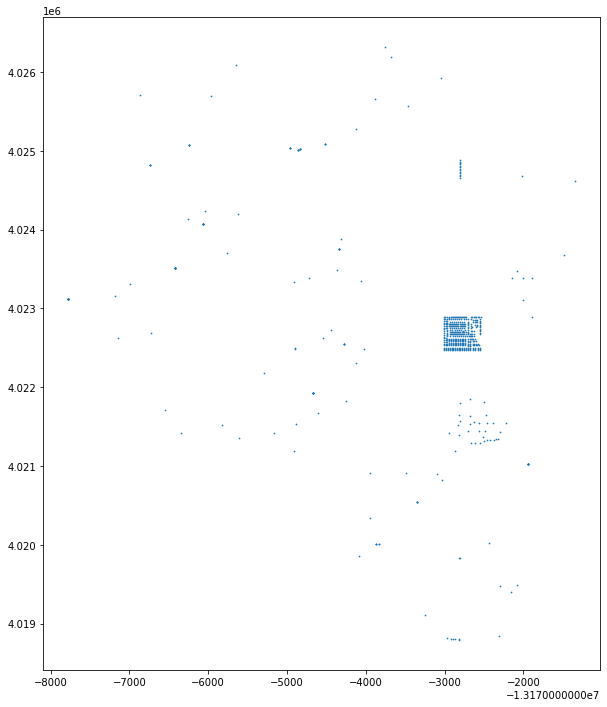

In [123]:
gdf10.plot(figsize=(12,12),
             markersize=0.5)

The resulting plot is showing us the data spatially 
organized for the city of Inglewood. We don't really know much yet, 
but its here! It's plotted. And well, would you look at that! 
That one section of mass produced buildings is there. Maybe we will be able to
understand it better now?

## Batch exploration

In [124]:
gdf10.use_desc.value_counts()

Residential      503
Commercial        56
Industrial        14
Institutional      2
Miscellaneous      1
Name: use_desc, dtype: int64

In [125]:
gdf10.use_type.value_counts()

SFR    419
CND     70
C/I     69
R-I     14
OTH      3
VAC      1
Name: use_type, dtype: int64

In [126]:
gdf10.year_built.value_counts()

2005    215
2006    207
2007     41
2000     34
2002     24
2004     21
2003     13
2001     11
2008      9
2009      1
Name: year_built, dtype: int64

In [127]:
gdf10.total_value.value_counts()

455000     133
415000     112
500000      28
548000      27
410000       8
          ... 
23707        1
801566       1
2997605      1
3139169      1
29960        1
Name: total_value, Length: 208, dtype: int64

In [128]:
# get the top 3 types of building use structures
top_3_uses = gdf10.use_desc.value_counts().head(3).index.tolist()
top_3_uses

['Residential', 'Commercial', 'Industrial']

In [129]:
#Slice of data for a single building type:



gdf10[gdf10.use_desc == 'Residential'].head()

,city,use_type,use_desc,year_built,total_value,center_lat,center_lon,geometry
1,INGLEWOOD,R-I,Residential,2004,1602454,33.979821,-118.358830,POINT (-13175644.650 4026092.803)
2,INGLEWOOD,SFR,Residential,2003,294445,33.969333,-118.326292,POINT (-13172022.534 4024684.880)
3,INGLEWOOD,SFR,Residential,2002,419983,33.968815,-118.320261,POINT (-13171351.199 4024615.404)
4,INGLEWOOD,SFR,Residential,2004,446000,33.961812,-118.321481,POINT (-13171486.988 4023675.510)
6,INGLEWOOD,SFR,Residential,2000,303623,33.970243,-118.333337,POINT (-13172806.763 4024807.112)


In [131]:
gdf10.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   city         576 non-null    object  
 1   use_type     576 non-null    object  
 2   use_desc     576 non-null    object  
 3   year_built   576 non-null    object  
 4   total_value  576 non-null    object  
 5   center_lat   576 non-null    float64 
 6   center_lon   576 non-null    float64 
 7   geometry     576 non-null    geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 40.5+ KB


In [132]:
gdf10=gdf10.to_crs('EPSG:3857')

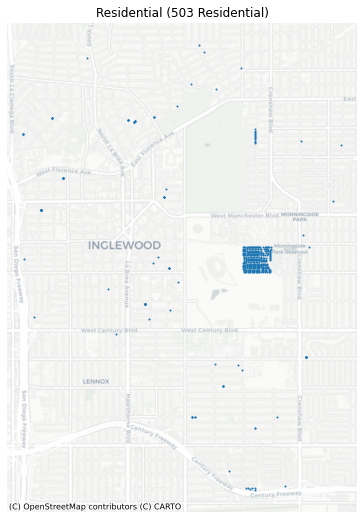

In [133]:
# crime variable
use_desc = 'Residential'

# map
ax = gdf10[gdf10.use_desc == use_desc].plot(figsize=(9,9), markersize=1)

# title (including count)
ax.set_title(use_desc + ' (' + str(gdf10[gdf10.use_desc == use_desc].shape[0]) + ' Residential)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:3857', # surprise! You can change the crs here!
                source=ctx.providers.CartoDB.Positron)

In [143]:
# create a function
def use_desc_by(use_desc='Residential'):
    
    # map
    ax = gdf10[gdf10.use_desc == use_desc].plot(figsize=(9,9), markersize=3)
    
    # axis
    ax.axis('off')
    
    # title (including count)
    ax.set_title(use_desc + ' (' + str(gdf10[gdf10.use_desc == use_desc].shape[0]) + ' Records)')

    # basemap
    ctx.add_basemap(ax,
                    crs='epsg:3857', # surprise! You can change the crs here!
                    source=ctx.providers.CartoDB.Positron)

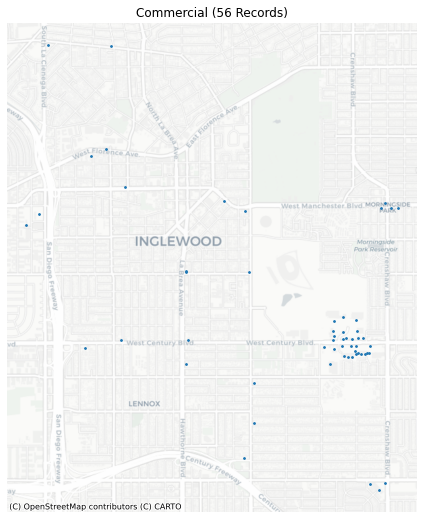

In [144]:
# call the function for a different building type
use_desc_by(use_desc = 'Commercial')

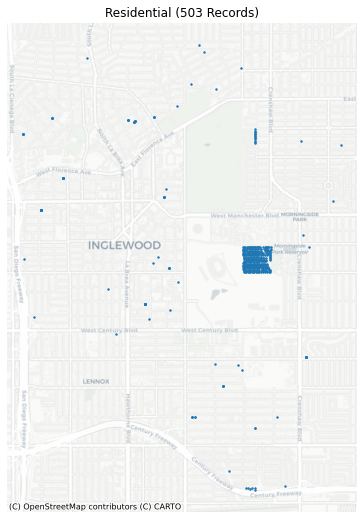

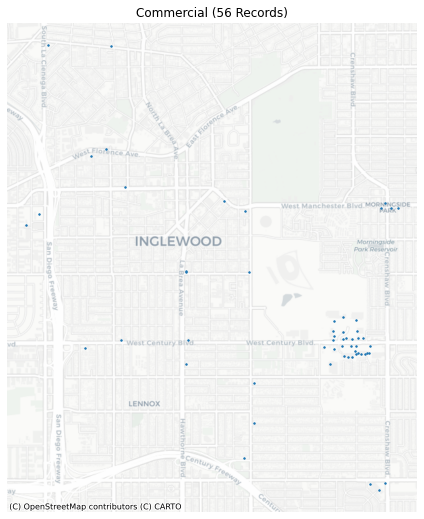

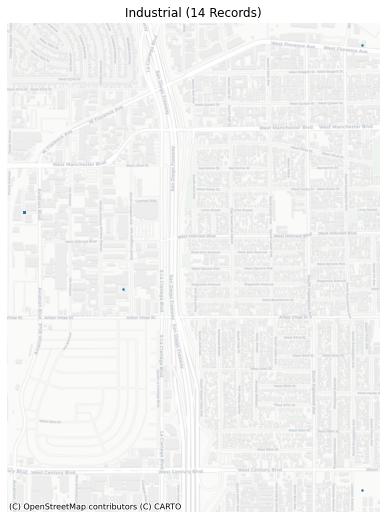

In [142]:
# loop through top 3 buildings uses
for use_desc in top_3_uses:
    use_desc_by(use_desc = use_desc)

# LETS PLAY WITH SEABORN

In [146]:
# seaborn needs an x and y column so let's extract it from the geometry field
gdf10['x'] = gdf10.geometry.x
gdf10['y'] = gdf10.geometry.y

In [147]:
gdf10.head()

,city,use_type,use_desc,year_built,total_value,center_lat,center_lon,geometry,x,y
0,INGLEWOOD,C/I,Commercial,2007,2918934,33.976890,-118.361746,POINT (-13175969.323 4025699.372),-1.317597e+07,4.025699e+06
1,INGLEWOOD,R-I,Residential,2004,1602454,33.979821,-118.358830,POINT (-13175644.650 4026092.803),-1.317564e+07,4.026093e+06
2,INGLEWOOD,SFR,Residential,2003,294445,33.969333,-118.326292,POINT (-13172022.534 4024684.880),-1.317202e+07,4.024685e+06
3,INGLEWOOD,SFR,Residential,2002,419983,33.968815,-118.320261,POINT (-13171351.199 4024615.404),-1.317135e+07,4.024615e+06
4,INGLEWOOD,SFR,Residential,2004,446000,33.961812,-118.321481,POINT (-13171486.988 4023675.510),-1.317149e+07,4.023676e+06


### Visualizing statistical relationships

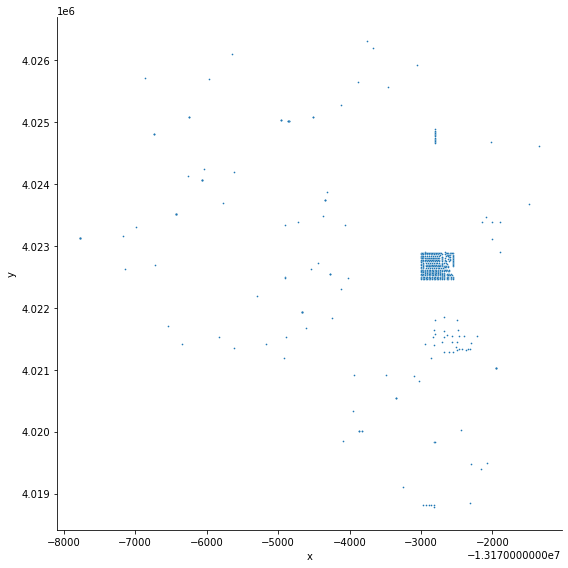

In [148]:
# scatterplot
sns.relplot(data=gdf10,
            x='x', 
            y='y',
            s=3, # size of point
            height=8 # size of plot
           )

# Seaborn Themes 

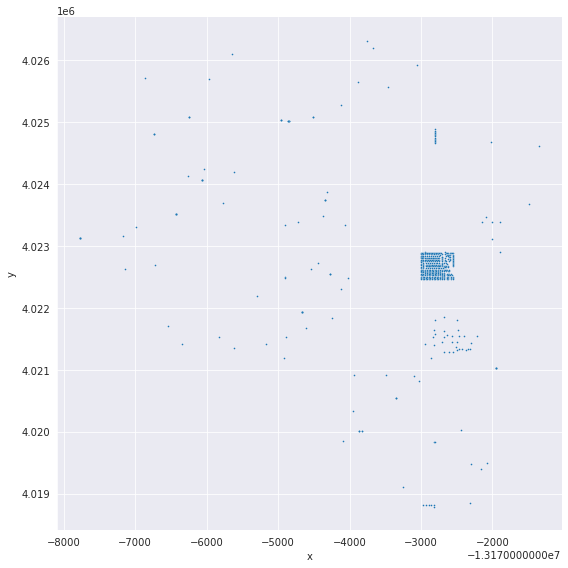

In [149]:
# seaborn comes with themes to make them prettier
sns.set_style('darkgrid')

# scatterplot 
sns.relplot(data=gdf10,
            x='x', 
            y='y',
            s=3,
            height=8)

In [150]:
# function
def sns_styles(style='darkgrid'):
    # seaborn comes with themes to make them prettier
    sns.set_style(style)

    # scatterplot 
    sns.relplot(data=gdf10,
                x='x', 
                y='y',
                s=3,
                height=8)

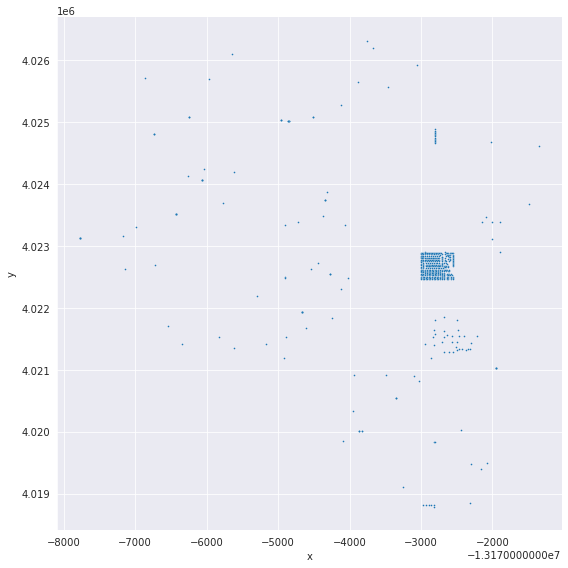

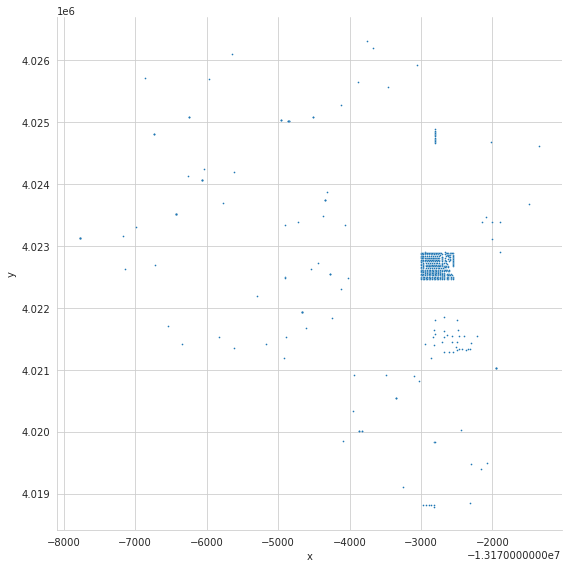

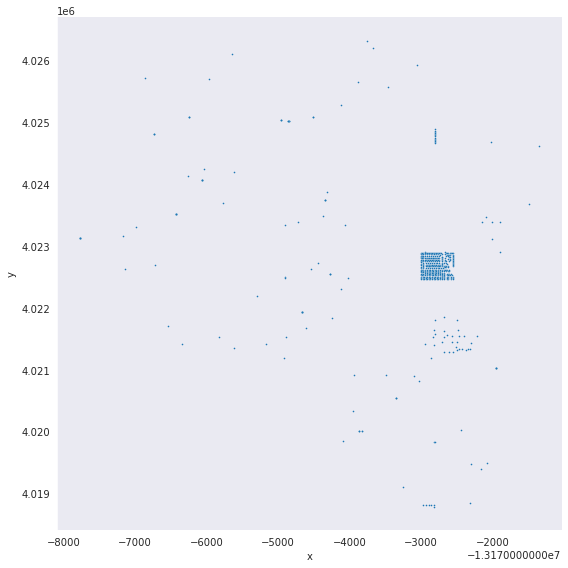

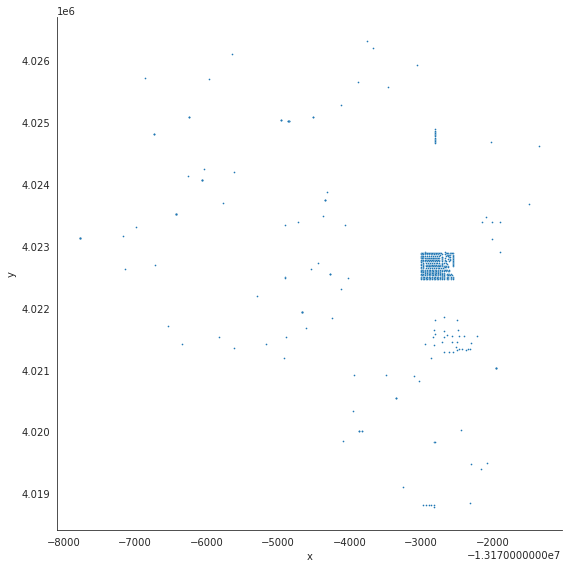

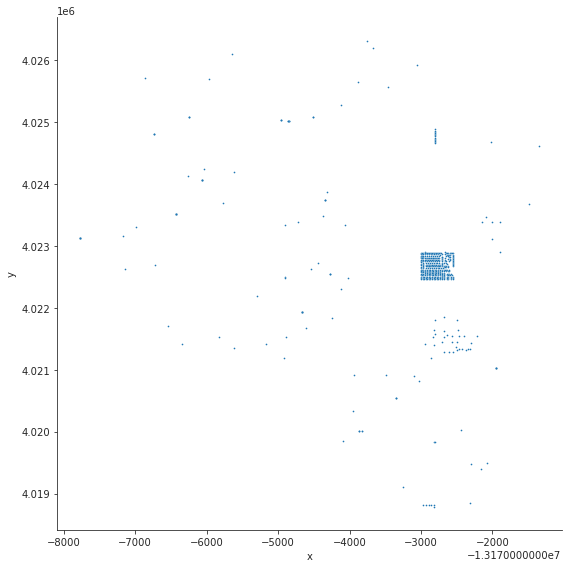

In [151]:
# loop
for style in ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']:
    sns_styles(style = style)

# Choosing Colors

In [152]:
color_list=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

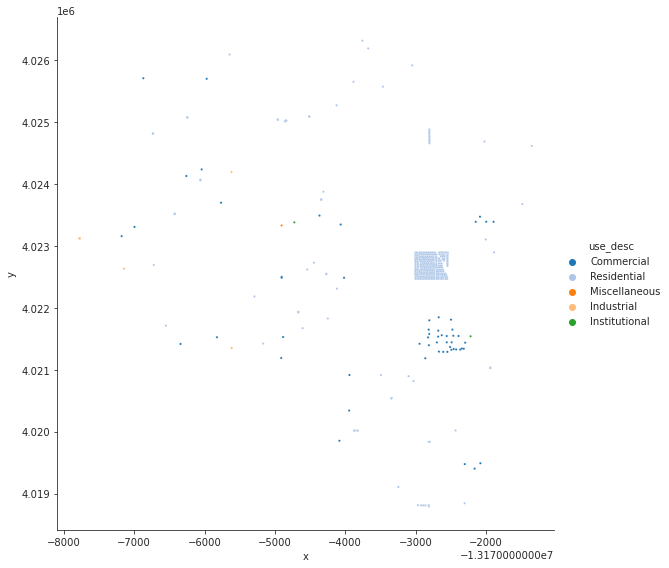

In [171]:
# scatterplot colored by area
sns.relplot(data=gdf10,
            x='x', 
            y='y',
            hue='use_desc',
            palette='tab20',
            s=5,
            height=8)

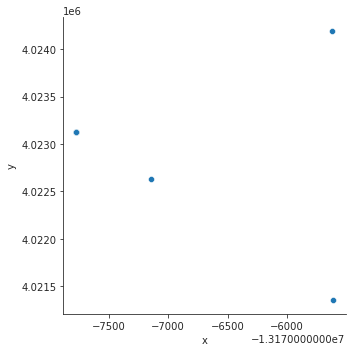

In [172]:
sns.relplot(data=gdf10[gdf10['use_desc']=='Industrial'],
            x='x', 
            y='y')

In [173]:
## Up here, all I did was filter to see what was built in the year 2000

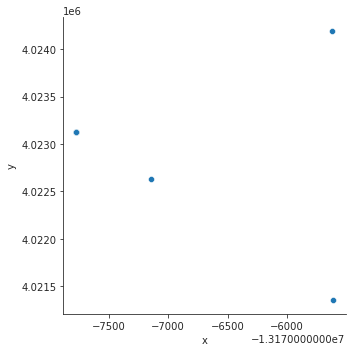

In [174]:
sns.relplot(data=gdf10[gdf10['use_desc']=='Industrial'],
            x='x', 
            y='y')

In [175]:
## Same here but for residential.

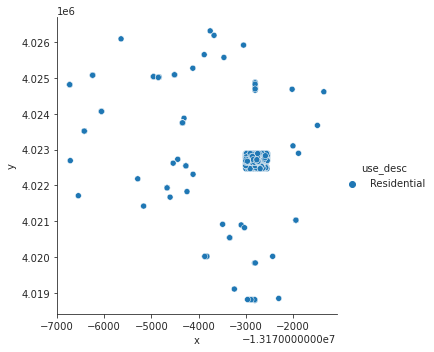

In [176]:
# color by categorical column
sns.relplot(data=gdf10[gdf10['use_desc']=='Residential'],
            x='x', 
            y='y',
            hue='use_desc')

# Joint Plots 

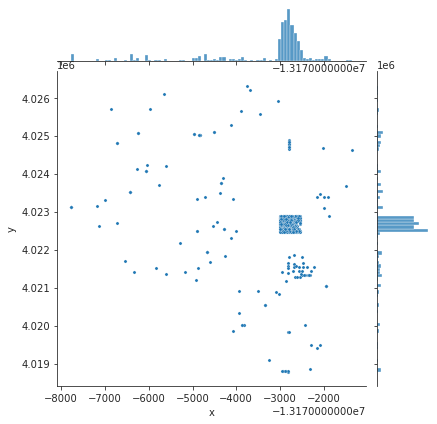

In [177]:
# scatterplot with edges
g = sns.jointplot(data = gdf10,
                  x='x', 
                  y='y',
                  s=10)

# With a Base Map

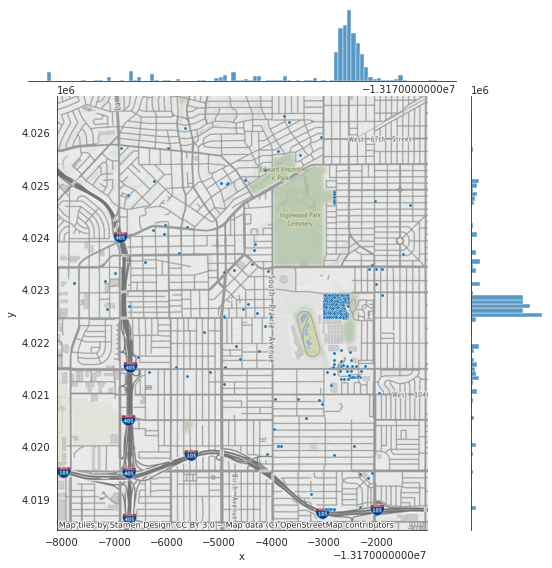

In [179]:
# add a basemap to jointplots
# scatterplot with edges
sns.set_style('white')
g = sns.jointplot(data = gdf10,
                  x='x', 
                  y='y',
                  s=10,
                  height=8 # make the map bigger
                 )

# Clean axes (optional)
# g.ax_joint.set_axis_off()

# add basemap
ctx.add_basemap(g.ax_joint,
                crs='epsg:3857')

# Hex Binning 

(-13178096.69943374,
 -13171029.985191071,
 4018413.7466159626,
 4026691.7615241096)

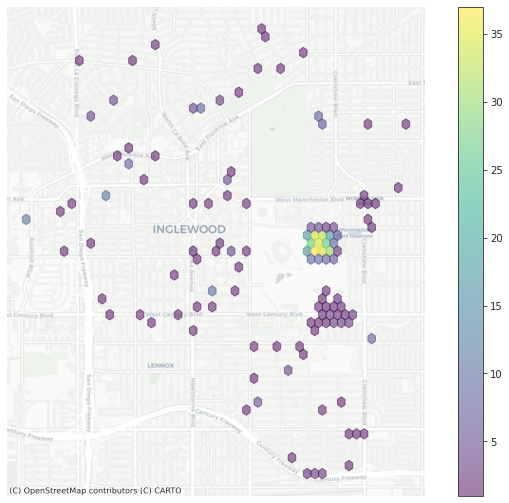

In [182]:
# Set up figure and axis
f, ax = plt.subplots(figsize=(12, 9))

# Generate and add hexbin with 50 hexagons in each 
# dimension, half transparency, ommitting grids with no crime,
# and using the viridis colormap
hb = ax.hexbin(
    x = gdf10['x'], 
    y = gdf10['y'],
    gridsize=50, 
    linewidths=1,
    alpha=0.5, 
    mincnt=1, # don't show zero
    cmap='viridis'
)

# Add basemap
ctx.add_basemap(
    ax, 
    crs='epsg:3857',
    source=ctx.providers.CartoDB.Positron
)

# Add colorbar
plt.colorbar(hb)

# Remove axes
ax.axis('off')

In [184]:
# create a subset of the data
gdf_HBW = gdf10[gdf10.use_desc.isin(['Residential','Commercial','Industrial'])]

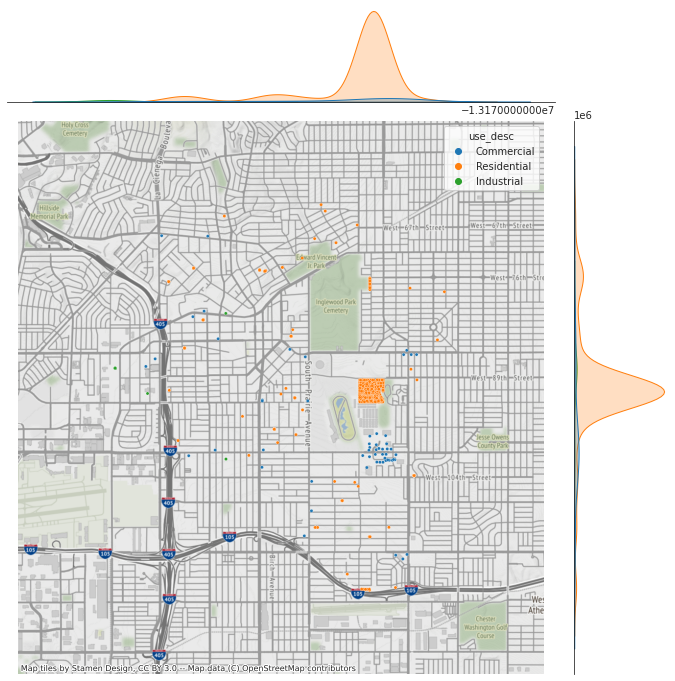

In [185]:
# color code by race
g = sns.jointplot(data = gdf_HBW,
                  x='x', 
                  y='y',
                  hue='use_desc',
                  s=10,
                  height=10 # make the map bigger
                 )

# Clean axes
g.ax_joint.set_axis_off()

# add basemap
ctx.add_basemap(g.ax_joint,
                crs='epsg:3857')



# Centrography

Central Tendency ....

In [186]:
# compute the mean and median centers
mean_center = centrography.mean_center(gdf10[['x','y']])
med_center = centrography.euclidean_median(gdf10[['x','y']])

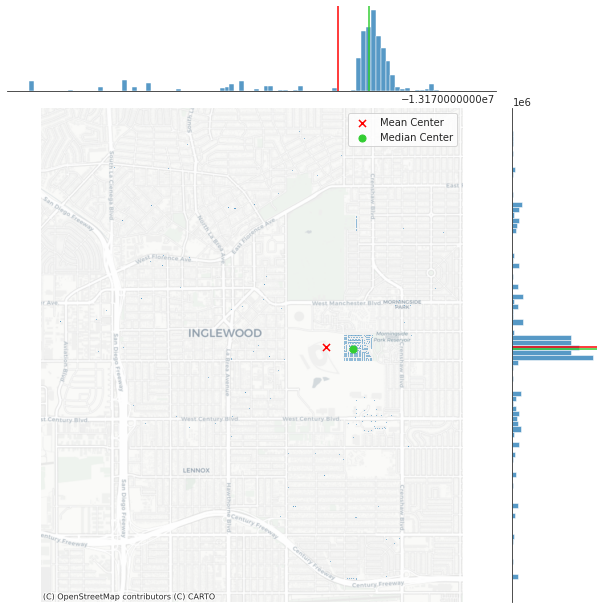

In [187]:
# Generate scatter plot
g = sns.jointplot(
    x='x', y='y', data=gdf10, s=0.75, height=9
)

# Add mean point and marginal lines
# *mean_center is shortcut for x=mean_center[0],y=mean_center[1]
g.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
g.ax_marg_x.axvline(mean_center[0], color='red')
g.ax_marg_y.axhline(mean_center[1], color='red')

# Add median point and marginal lines
g.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
g.ax_marg_x.axvline(med_center[0], color='limegreen')
g.ax_marg_y.axhline(med_center[1], color='limegreen')

# Legend
g.ax_joint.legend()

# Add basemap
ctx.add_basemap(
    g.ax_joint, 
    crs='epsg:3857',
    source=ctx.providers.CartoDB.Positron
)

# Clean axes
g.ax_joint.set_axis_off()

# Display
plt.show()


# Dispersion and Orientation

In [189]:
major, minor, rotation = centrography.ellipse(gdf10[['x','y']])

In [190]:
mean_center

array([-13173310.46820272,   4022686.21850138])

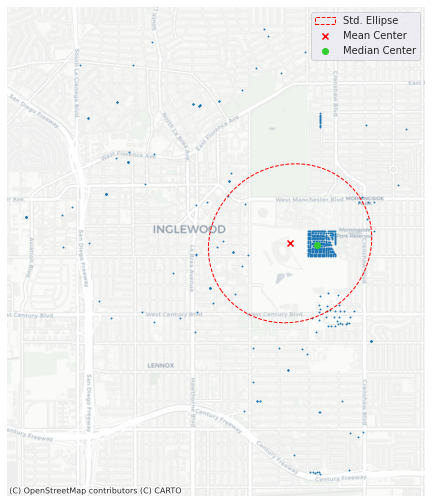

In [191]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(gdf10['x'], gdf10['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('off')

# add a basemap
ctx.add_basemap(ax,
                crs='epsg:3857',
                source=ctx.providers.CartoDB.Positron)

# Display
plt.show()

# Creating a Function

In [206]:
def use_ellipse(year_built, use_desc):
    
    # filter the data by building type
    use_desc_filtered = gdf10[(gdf10.use_desc == use_desc) & (gdf10.year_built == year_built)]

    # mean center and median
    mean_center = centrography.mean_center(use_desc_filtered[['x','y']])
    med_center = centrography.euclidean_median(use_desc_filtered[['x','y']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(use_desc_filtered[['x','y']])

    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(9, 9))

    # plot crime points
    ax.scatter(use_desc_filtered['x'], use_desc_filtered['y'], s=3)

    # add the mean and median center points
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')

    ax.add_patch(ellipse)

    # add the legend
    ax.legend()

    # no axix
    ax.axis('Off')

    # add a dynamic title
    ax.set_title(year_built + ': ' + str(len(use_desc_filtered)) + ' type of use "' + use_desc + '" (Year 2005)')

    # add a basemap
    ctx.add_basemap(ax,
                    crs='epsg:3857',
                    source=ctx.providers.CartoDB.Positron)
    # Display
    plt.show()

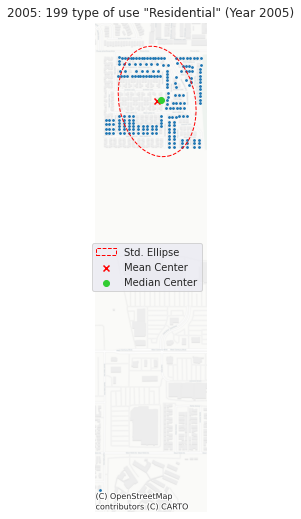

In [207]:
# call the function for a single area and a single crime type
use_ellipse(year_built='2005',use_desc='Residential')

In [208]:
# get top 10 values
top10value = gdf10['total_value'].value_counts().head(10).index.tolist()
top10value

['455000',
 '415000',
 '500000',
 '548000',
 '410000',
 '370000',
 '400000',
 '389931',
 '373500',
 '455400']

In [209]:
# get top 3 years built
top3yearsbuilt = gdf10['year_built'].value_counts().head(3).index.tolist()
top3yearsbuilt

['2005', '2006', '2007']

IDK MAN